This notebook loads data exported directly from Google Earth engine, performs basic cleaning and saves it in a more usable Parquet format

In [3]:
import os
import pandas as pd
import logging
import plotly.graph_objects as go
import pygeohash as pgh
from tqdm import tqdm
from datetime import datetime

In [4]:
RES_PATH = '../../res/'
os.listdir(RES_PATH)

['salinity_2.npy', 'salinity_2.csv', 'water_temp_2.npy', 'water_temp_2.csv']

In [5]:
CSV_NAME = 'water_temp_2.csv'
df = pd.read_csv(RES_PATH + CSV_NAME)
df.head()

,month,lon,lat,water_temp_2,year
0,0,-61.067473,11.480469,26.813548,2000
1,1,-61.067473,11.480469,26.564828,2000
2,2,-61.067473,11.480469,26.395613,2000
3,3,-61.067473,11.480469,26.656900,2000
4,4,-61.067473,11.480469,27.514286,2000


In [7]:
df['geohash'] = df.apply(lambda row: pgh.encode(precision=7, latitude=row.lat, longitude=row.lon), axis=1)
df

,month,lon,lat,water_temp_2,year,geohash
0,0,-61.067473,11.480469,26.813548,2000,ddh963u
1,1,-61.067473,11.480469,26.564828,2000,ddh963u
2,2,-61.067473,11.480469,26.395613,2000,ddh963u
3,3,-61.067473,11.480469,26.656900,2000,ddh963u
4,4,-61.067473,11.480469,27.514286,2000,ddh963u
...,...,...,...,...,...,...
4187299,7,-64.660734,19.313779,28.400593,2021,de6jbeg
4187300,8,-64.660734,19.313779,28.980308,2021,de6jbeg
4187301,9,-64.660734,19.313779,28.919319,2021,de6jbeg
4187302,10,-64.660734,19.313779,28.374296,2021,de6jbeg


In [10]:
# get number of individual data streams/coordinate positions
len(df.geohash.unique())

15861

In [12]:
df['date'] = df.apply(lambda row: datetime(row.year, row.month+1, 1), axis=1) 
df

,month,lon,lat,water_temp_2,year,geohash,date
0,0,-61.067473,11.480469,26.813548,2000,ddh963u,2000-01-01
1,1,-61.067473,11.480469,26.564828,2000,ddh963u,2000-02-01
2,2,-61.067473,11.480469,26.395613,2000,ddh963u,2000-03-01
3,3,-61.067473,11.480469,26.656900,2000,ddh963u,2000-04-01
4,4,-61.067473,11.480469,27.514286,2000,ddh963u,2000-05-01
...,...,...,...,...,...,...,...
4187299,7,-64.660734,19.313779,28.400593,2021,de6jbeg,2021-08-01
4187300,8,-64.660734,19.313779,28.980308,2021,de6jbeg,2021-09-01
4187301,9,-64.660734,19.313779,28.919319,2021,de6jbeg,2021-10-01
4187302,10,-64.660734,19.313779,28.374296,2021,de6jbeg,2021-11-01


In [44]:
df.to_parquet(RES_PATH + 'water_temp_2.parquet')

Sanity-Checking our Output

<AxesSubplot:xlabel='date'>

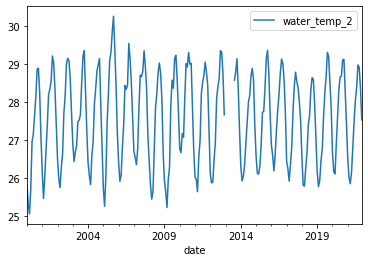

In [14]:
df[df.geohash == 'de6jbeg'][['date', 'water_temp_2']].set_index('date').plot()



In [16]:
df = df.dropna()
df

,month,lon,lat,water_temp_2,year,geohash,date
0,0,-61.067473,11.480469,26.813548,2000,ddh963u,2000-01-01
1,1,-61.067473,11.480469,26.564828,2000,ddh963u,2000-02-01
2,2,-61.067473,11.480469,26.395613,2000,ddh963u,2000-03-01
3,3,-61.067473,11.480469,26.656900,2000,ddh963u,2000-04-01
4,4,-61.067473,11.480469,27.514286,2000,ddh963u,2000-05-01
...,...,...,...,...,...,...,...
4187299,7,-64.660734,19.313779,28.400593,2021,de6jbeg,2021-08-01
4187300,8,-64.660734,19.313779,28.980308,2021,de6jbeg,2021-09-01
4187301,9,-64.660734,19.313779,28.919319,2021,de6jbeg,2021-10-01
4187302,10,-64.660734,19.313779,28.374296,2021,de6jbeg,2021-11-01


In [30]:
# plot data for single point
single = df[df.geohash == 'de6jbeg'].reset_index(drop=True)
single

,month,lon,lat,water_temp_2,year,geohash,date
0,0,-64.660734,19.313779,25.837129,2000,de6jbeg,2000-01-01
1,1,-64.660734,19.313779,25.336034,2000,de6jbeg,2000-02-01
2,2,-64.660734,19.313779,25.066226,2000,de6jbeg,2000-03-01
3,3,-64.660734,19.313779,25.719567,2000,de6jbeg,2000-04-01
4,4,-64.660734,19.313779,26.960000,2000,de6jbeg,2000-05-01
...,...,...,...,...,...,...,...
252,7,-64.660734,19.313779,28.400593,2021,de6jbeg,2021-08-01
253,8,-64.660734,19.313779,28.980308,2021,de6jbeg,2021-09-01
254,9,-64.660734,19.313779,28.919319,2021,de6jbeg,2021-10-01
255,10,-64.660734,19.313779,28.374296,2021,de6jbeg,2021-11-01
